In [22]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import numpy as np

In [23]:
def plot_feature_important_up(model, feature_num, feature_names):
  n_features = feature_num    # feature(변수의 개수)
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정def

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [25]:
### 01. X,y로 데이터를 나눈이후에
### 02. 모델(GradientBoostingClassifier)
### 03. 학습을 수행
### 04. 정확도 model.score()

In [26]:
#01.
X = cancer.data
y = cancer.target
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

In [27]:
#02.
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train,y_train)
print(gb.score(X_test,y_test))
print(gb.score(X_train,y_train))

0.965034965034965
1.0


In [29]:
### max_depth조절
### learning_rate 조절
for i in range(1,7):
    gb = GradientBoostingClassifier(random_state=0,max_depth=i)
    gb.fit(X_train,y_train)
    print("tree depth : {}". format(i))
    print(gb.score(X_train,y_train))
    print(gb.score(X_test,y_test))

tree depth : 1
0.9906103286384976
0.972027972027972
tree depth : 2
1.0
0.972027972027972
tree depth : 3
1.0
0.965034965034965
tree depth : 4
1.0
0.958041958041958
tree depth : 5
1.0
0.9020979020979021
tree depth : 6
1.0
0.9440559440559441


In [33]:
### learning_rate 를 변경해가며 확인해보기
### [0.01,0.05,0.07,0.09,0.001,0.005,0.007,0.009]
gl = [0.01,0.05,0.07,0.09,0.001,0.005,0.007,0.009]

In [34]:
for i in gl:
    gb = GradientBoostingClassifier(random_state=0,max_depth=2,learning_rate=i)
    gb.fit(X_train,y_train)
    print("learning rate: {}". format(i))
    print(gb.score(X_train,y_train))
    print(gb.score(X_test,y_test))

learning rate: 0.01
0.9741784037558685
0.965034965034965
learning rate: 0.05
0.9953051643192489
0.958041958041958
learning rate: 0.07
1.0
0.965034965034965
learning rate: 0.09
1.0
0.972027972027972
learning rate: 0.001
0.6267605633802817
0.6293706293706294
learning rate: 0.005
0.9577464788732394
0.951048951048951
learning rate: 0.007
0.9765258215962441
0.958041958041958
learning rate: 0.009
0.9741784037558685
0.965034965034965


In [37]:
gb.feature_importances_

array([0.        , 0.00908822, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.42968017, 0.        , 0.        ,
       0.        , 0.00178653, 0.        , 0.01215869, 0.        ,
       0.        , 0.00696351, 0.        , 0.        , 0.        ,
       0.01733286, 0.00819815, 0.29016224, 0.05351506, 0.00975757,
       0.        , 0.02384589, 0.13751112, 0.        , 0.        ])

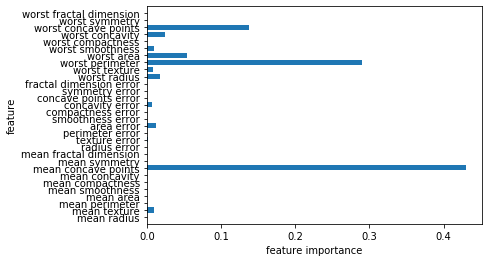

In [44]:
feature_num = 30
feature_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']

plot_feature_important_up(gb, feature_num, feature_names)